In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [15]:
df=pd.read_csv('/content/Mall_Customers.csv')
print(df.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


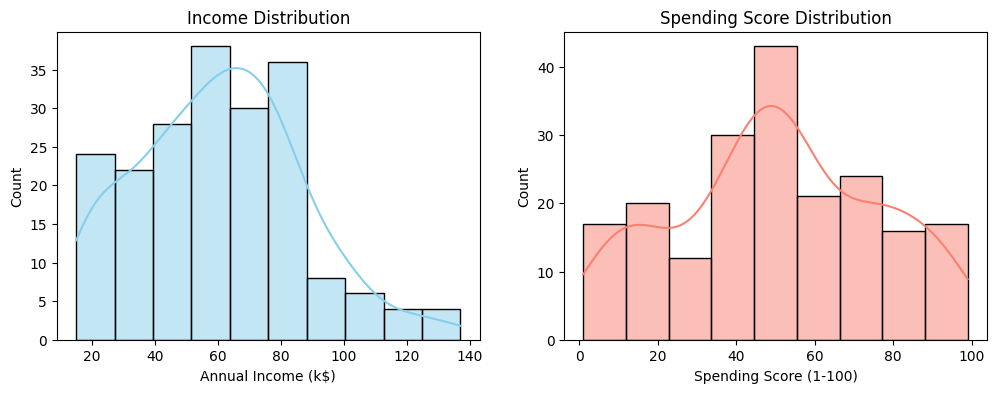

In [16]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.histplot(df['Annual Income (k$)'], kde=True, color='skyblue').set_title('Income Distribution')
plt.subplot(1, 2, 2)
sns.histplot(df['Spending Score (1-100)'], kde=True, color='salmon').set_title('Spending Score Distribution')
plt.show()


In [18]:
# Feature Selection
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Scaling - Critical for K-Means
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

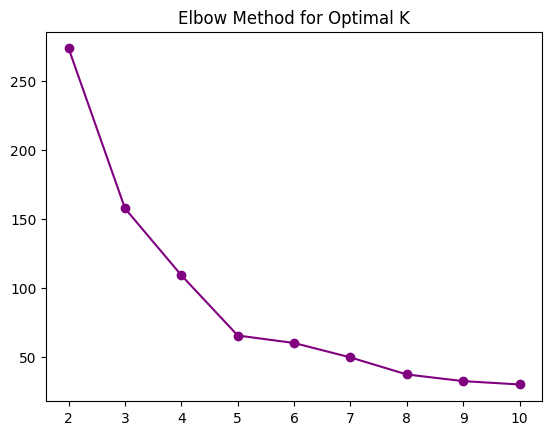

Optimal clusters based on Silhouette Score: 5


In [19]:

# Finding K using Elbow and Silhouette Score
wcss = []
scores = []

for i in range(2, 11):
    km = KMeans(n_clusters=i, init='k-means++', random_state=42)
    km.fit(X_scaled)
    wcss.append(km.inertia_)
    scores.append(silhouette_score(X_scaled, km.labels_))

# Plotting the Elbow (to show logic)
plt.plot(range(2, 11), wcss, marker='o', color='purple')
plt.title('Elbow Method for Optimal K')
plt.show()

# Print the best Silhouette Score
print(f"Optimal clusters based on Silhouette Score: {np.argmax(scores) + 2}")

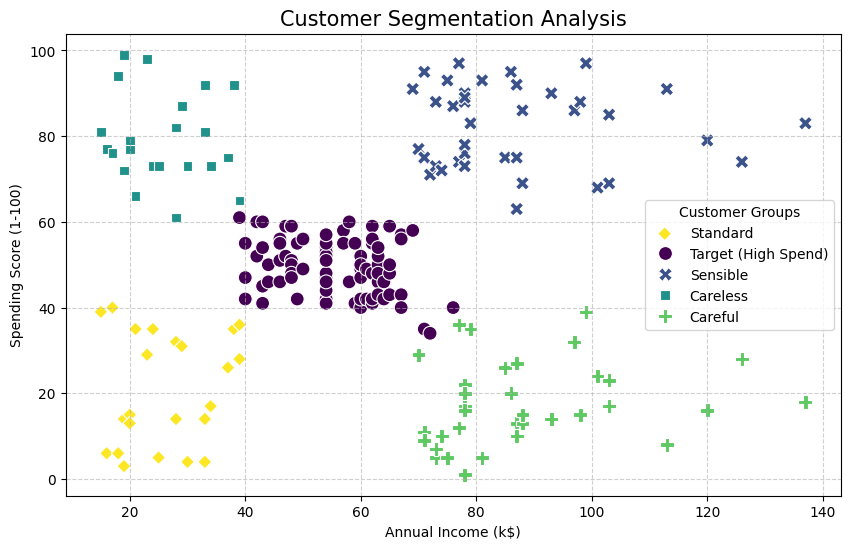

--- Business Insights ---
         Annual Income (k$)  Spending Score (1-100)
Segment                                            
0                 55.296296               49.518519
1                 86.538462               82.128205
2                 25.727273               79.363636
3                 88.200000               17.114286
4                 26.304348               20.913043


In [20]:
# Final Model (K=5 is standard for this dataset)
model = KMeans(n_clusters=5, init='k-means++', random_state=42)
df['Segment'] = model.fit_predict(X_scaled)

# Creating a high-impact visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)',
                hue='Segment', palette='viridis', s=100, style='Segment')

# Adding the labels an interviewer wants to hear
plt.title('Customer Segmentation Analysis', fontsize=15)
plt.legend(title='Customer Groups', labels=['Standard', 'Target (High Spend)', 'Sensible', 'Careless', 'Careful'])
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Final Business Insight
print("--- Business Insights ---")
print(df.groupby('Segment')[['Annual Income (k$)', 'Spending Score (1-100)']].mean())